In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False})
import os


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_openml
from sklearn.metrics import f1_score, confusion_matrix

from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img

### 이미지 파일이 들어있는 폴더 구성
- img
    - cat
        - 고양이 이미지 파일들
    - dog
        - 개 이미지 파일들

In [7]:
# 이미지 불러오기
# 이미지 rgb값이 0~255이기 때문에 255로 나누어서 0~1의 값으로 스케일링 한다
data_generator = ImageDataGenerator(rescale=1/255)
# img 폴더 내의 모든 이미지들을 98, 98사이즈로 불러온다 
# 폴더명이 라벨값이고 여기서는 고양이 또는 개 두가지 이므로 binary로 0 또는 1 값으로 변환한다
train_gen = data_generator.flow_from_directory('img', target_size=(98, 98),
                                              class_mode = 'binary', seed=0, batch_size=100)

Found 32 images belonging to 2 classes.


In [12]:
# 입출력 구성
x_data, y_data = train_gen.next()

In [14]:
# 이미지 데이터 shape
# 이미지 개수, 이미지 크기, 색상(rgb)
x_data.shape

(32, 98, 98, 3)

In [15]:
y_data.shape

(32,)

In [16]:
y_data

array([1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [19]:
# img 폴더내의 폴더명 -> 라벨명
# cat -> 0, dog -> 1
label = os.listdir('img')
label

['cat', 'dog']

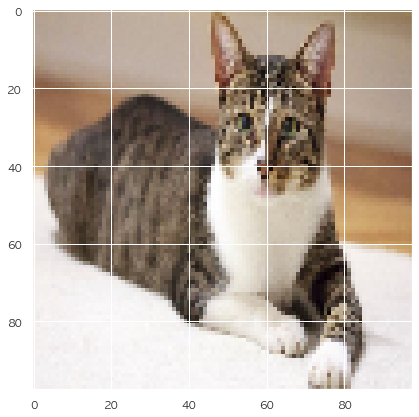

In [23]:
# 입력 데이터 확인
plt.imshow(x_data[1])
plt.show()

In [24]:
#1학습시키기 위해 입력 데이터 2차원으로 변환
x_data = x_data.reshape(32, -1)
x_data.shape

(32, 28812)

### MLP Classifier 

In [32]:
model_nn = MLPClassifier(verbose=1)
model_nn.fit(x_data, y_data)

Iteration 1, loss = 0.93442042
Iteration 2, loss = 17.87918423
Iteration 3, loss = 13.79067173
Iteration 4, loss = 3.49188361
Iteration 5, loss = 5.16252553
Iteration 6, loss = 1.98590941
Iteration 7, loss = 3.43829272
Iteration 8, loss = 4.93216226
Iteration 9, loss = 3.25000999
Iteration 10, loss = 0.43728746
Iteration 11, loss = 2.88652048
Iteration 12, loss = 2.92054195
Iteration 13, loss = 0.76761715
Iteration 14, loss = 1.74157880
Iteration 15, loss = 2.75214229
Iteration 16, loss = 1.77040695
Iteration 17, loss = 0.35827997
Iteration 18, loss = 1.78037137
Iteration 19, loss = 1.94460971
Iteration 20, loss = 0.58616110
Iteration 21, loss = 0.87578972
Iteration 22, loss = 1.66918280
Iteration 23, loss = 1.25569383
Iteration 24, loss = 0.35195632
Iteration 25, loss = 0.90081643
Iteration 26, loss = 1.22792179
Iteration 27, loss = 0.45455352
Iteration 28, loss = 0.46056275
Iteration 29, loss = 0.91590683
Iteration 30, loss = 0.75470345
Iteration 31, loss = 0.51322070
Iteration 32, l

/Users/dongja/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=1)

In [33]:
model_nn.score(x_data, y_data)

1.0

In [34]:
# 예측값
y_pred = model_nn.predict(x_data)

In [35]:
# f1 score
f1_score(y_data, y_pred)

1.0

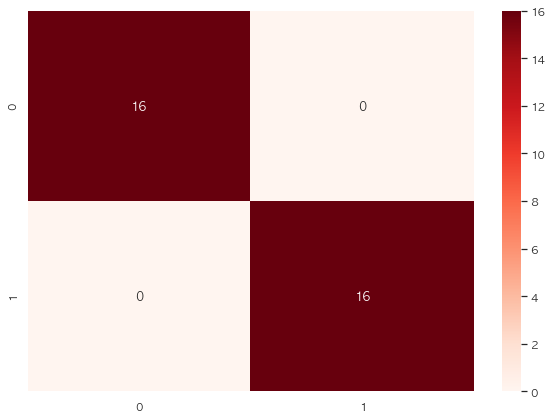

In [62]:
# confusion matrix
cm = confusion_matrix(y_data, y_pred)
sns.heatmap(cm, annot=True, cmap='Reds')
plt.show()

학습 데이터에 대해 100% 정확한 예측함

### 학습하지 않은 이미지로 테스트

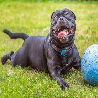

In [66]:
# 테스트 이미지 불러오기
test_img_dog = load_img('test_img/dog.jpeg', target_size=(98, 98))
test_img_dog

In [67]:
# 배열로 변환, 스케일링
test_img_dog = img_to_array(test_img_dog) / 255
test_img_dog.shape

(98, 98, 3)

In [68]:
# 2차원으로 변환
test_img_dog = test_img_dog.reshape(1, -1)
test_img_dog.shape

(1, 28812)

In [69]:
# 예측
label[model_nn.predict(test_img_dog)[0].astype(int)]

'cat'

개를 고양이로 잘못 예측

학습된 데이터에 대해 100% 정확하게 예측했지만 학습하지 않은 테스트 데이터에 대해 잘못 예측함
-> 학습한 데이터 양이 적어서 그런 것이라 생각됨